# An Investigation of Medical Appointment Attendance Rates

<a id = 'intro'></a>

## Introduction

This dataset contains patient information from 100k + medical appointments in Brazil. The data contains a number of possible datapoints that may indicate whether or not a patient will show up for an appointment. We will you the CRISP-DM approach to answer our questions


The original dataset can be found [here](https://www.kaggle.com/joniarroba/noshowappointments).

## Business Understanding

In the following analysis, we will answer the following questions: Does Age play a huge factor in patients not showing? Is Scholarship the reason why patients don’t show? Does not receiving and SMS message cause patients to not show?
Also find any further analysis to have a more understadning about the data.


## Data Understanding

first we prepared the data using these common python data analysis tools/packages: numpy, pandas, matplotlib, and seaborn. Then we start providing some stats about data so we can go to the next step 

In [110]:
import unicodecsv
from datetime import datetime as dt
import pandas as pd
import numpy as np
import matplotlib
from matplotlib import style
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline

In [111]:
def read_csv(filename):
    """
    Description: This function will encode the Neighbourhood column and any other non-english letters

    Arguments:
    filename: name of csv file. 

    Returns:
    new encoded file.
    """
    
    with open(filename, 'rb') as f:
        reader = unicodecsv(f)
        return reader

In [112]:
# After much trial and error this was the only solution that successfully encoded the Neighbourhood column correctly.
appt_df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv', encoding='utf-8')

In [113]:
def get_average(x, y):
    """
    Description: This function will get an average of two values

    Arguments:
    x: first value.
    y: second valuse

    Returns:
    average.
    """
    
    
    total = (y - x)
    return total.mean()

In [114]:

def get_value_range(low, high):
    
    """
    Description: Function to easily calculate the minimum and maximum value.

    Arguments:
    low: first value.
    high: second valuse

    Returns:
    the min and max value.
    """
    
    min_val = low.min()
    max_val = high.max()
    return (min_val, max_val)

In [115]:
def hist_data(data, colors):
    

    """
    funtion to plot a histogram and fit KDE
    """
    
    total = data.values
    sns.distplot(data, color=colors);

In [116]:
def percent_convert(data):
    
    """
    Description: convert data to percentage to easily understand it.

    Arguments:
    data: data needed to be conveted.

    Returns:
    percentage.
    """
    
    convert = ((data.value_counts() / data.count()) * 100).round(decimals=0)
    return convert

In [117]:
def combine_data(data, column_name):
    
    """
    Description: combine data into one column.

    Arguments:
    data: data needed to be combined
    column_name: column name after combining them
    
    Returns:
    the column_name created .
    """
    
    result = column_name.append()
    for items in data:
        return result
    return column_name

In [118]:
appt_df.isnull().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

We then took a look at the datatype for each column in our dataset.  This is important to how we will interact with the data. We will also take a look at the first few rows of our data to see if the datatype and values need to be changed for consistency and further analysis.

In [119]:
appt_df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [120]:
appt_df.dtypes

PatientId         float64
AppointmentID       int64
Gender             object
ScheduledDay       object
AppointmentDay     object
Age                 int64
Neighbourhood      object
Scholarship         int64
Hipertension        int64
Diabetes            int64
Alcoholism          int64
Handcap             int64
SMS_received        int64
No-show            object
dtype: object

In [121]:
appt_df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


## Data Preparation



#### After the Data Understanding process, we can see that there are quite a few unusual results as follows:

1. The translation to English in the header needs to be corrected.   
2. PatientId should be an integer instead of a float.
3. ScheduledDay and AppointmentDay are not consistent.  
4. Age also has some erroneous values (-1 and 115).    
5. Handcap has a max value of 4.    

In [122]:
#Rename columns to correct spelling errors and for consistency and clarity
appt_df.rename(columns={'AppointmentID':'AppointmentId','Gender':'Sex','Neighbourhood':'Location', 'Hipertension':'Hypertension', 'Handcap':'Handicap', 'SMS_received':'Text', 'No-show':'NoShow'}, inplace=True)

In [123]:
#Convert PatientId from float to int64.
appt_df['PatientId'] = appt_df['PatientId'].astype(int)

In order to measure the affect of wait-time, we change the datatype of **_ScheduledDay_** and **_AppointmentDay_** from an object to datetime.  
An additional column **_Days_** was added to calculate the days a patient waited for an appointment.

In [124]:
#convert ScheduledDay and AppointmentDay from objects to datetime
appt_df['ScheduledDay'] = pd.to_datetime(appt_df.ScheduledDay).dt.date

In [125]:
appt_df['AppointmentDay'] = pd.to_datetime(appt_df.AppointmentDay).dt.date

In [126]:
#calculate the total days a patient will wait for their appointment and put that in a new column
appt_df['Days'] = appt_df['AppointmentDay'] - appt_df['ScheduledDay']

In [127]:
#strip out all data other than the day count
appt_df['Days'] = appt_df['Days'].dt.days

In [128]:
appt_df.dtypes

PatientId          int64
AppointmentId      int64
Sex               object
ScheduledDay      object
AppointmentDay    object
Age                int64
Location          object
Scholarship        int64
Hypertension       int64
Diabetes           int64
Alcoholism         int64
Handicap           int64
Text               int64
NoShow            object
Days               int64
dtype: object

In [129]:
appt_df.head()

,PatientId,AppointmentId,Sex,ScheduledDay,AppointmentDay,Age,Location,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,Text,NoShow,Days
0,29872499824296,5642903,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No,0
1,558997776694438,5642503,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No,0
2,4262962299951,5642549,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No,0
3,867951213174,5642828,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,0
4,8841186448183,5642494,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No,0


There seems to be a very large timespan from date scheduled to appointment, so we checked the minimum and maximum wait-time.

In [130]:
get_value_range(appt_df.ScheduledDay, appt_df.ScheduledDay)

(datetime.date(2015, 11, 10), datetime.date(2016, 6, 8))

In [131]:
get_value_range(appt_df.AppointmentDay, appt_df.AppointmentDay)

(datetime.date(2016, 4, 29), datetime.date(2016, 6, 8))

When we took a look at the range of days patients waited for an appointment we saw negative values.  
The rows containing the negative values were dropped from the dataframe.  After removing the negative values we ensured that there wer only positive values present and that no nulls resulted in the removal of the negative value rows.

In [132]:
get_value_range(appt_df.Days, appt_df.Days)

(-6, 179)

In [133]:
neg_days = appt_df[appt_df['Days'] < 0]

In [134]:
appt_df.drop(neg_days.index, axis=0, inplace=True)

In [135]:
#Ensuring that the expected values are present.
get_value_range(appt_df.Days, appt_df.Days)

(0, 179)

In [136]:
#Count columns data totals to ensure that the drop operation executed as expected.
appt_df.count()

PatientId         110522
AppointmentId     110522
Sex               110522
ScheduledDay      110522
AppointmentDay    110522
Age               110522
Location          110522
Scholarship       110522
Hypertension      110522
Diabetes          110522
Alcoholism        110522
Handicap          110522
Text              110522
NoShow            110522
Days              110522
dtype: int64

While we knew that the age range had unreasonable and inaccurate values, we checked to see how many rows would be affected.  The number of rows affected were minimal so the decision was made to remove those rows from the dataframe.

In [137]:
appt_df.loc[(appt_df['Age'] < 0) | (appt_df['Age'] > 100)].count()

PatientId         8
AppointmentId     8
Sex               8
ScheduledDay      8
AppointmentDay    8
Age               8
Location          8
Scholarship       8
Hypertension      8
Diabetes          8
Alcoholism        8
Handicap          8
Text              8
NoShow            8
Days              8
dtype: int64

In [138]:
#Locate rows with age below 0 or above 100.
impAge = appt_df.loc[(appt_df['Age'] < 0) | (appt_df['Age'] > 100)]

In [139]:
#Remove rows with Age below 0 and above 100.
appt_df.drop(impAge.index, axis=0, inplace=True)

We next examined the possibility of duplicate values in both **_PatientId_** and **_AppointmentId_**.  We were not surprised to find duplicate patient ids however the number of duplicates was rather unusual.  All AppointmentId values were unique so no further cleanup was necessary.

In [140]:
p_total = appt_df.PatientId.count()

In [141]:
#Calculate the number of unique patient ids.
appt_df.PatientId.nunique()

62294

In [142]:
#calculate the number of duplicate patient ids.
appt_df.PatientId.duplicated().sum()

48220

In [143]:
#calculate the percentage of duplicate Patient Ids.
(((appt_df.PatientId.duplicated().value_counts())/p_total) * 100).round(decimals=0)

False    56.0
True     44.0
Name: PatientId, dtype: float64

In [144]:
#Check for duplicate AppointmentId values.
appt_df.AppointmentId.duplicated().value_counts()

False    110514
Name: AppointmentId, dtype: int64

The criteria for the values in **_Handicap_** is not discernable.  In the first 4 rows above, it appeared that there was a coorelation between the specified diseases and the values in **_Handicap_**.  However, the following row deviates from this with a value of 2 and all specified disease values are 0.  For this reason, the **_Handicap_** column was dropped from the dataframe.

In [145]:
#Check values stored in Handicap and the total of those values.
appt_df['Handicap'].value_counts()

0    108279
1      2036
2       183
3        13
4         3
Name: Handicap, dtype: int64

In [146]:
appt_df.loc[appt_df['Handicap'] > 1].head()

,PatientId,AppointmentId,Sex,ScheduledDay,AppointmentDay,Age,Location,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,Text,NoShow,Days
946,72825819926211,5582483,M,2016-04-14,2016-04-29,94,BELA VISTA,0,1,1,0,2,1,No,15
1665,12429193284112,5525497,M,2016-03-30,2016-04-29,64,SANTA MARTHA,0,1,0,1,2,1,No,30
1666,12429193284112,5525498,M,2016-03-30,2016-04-29,64,SANTA MARTHA,0,1,0,1,2,0,No,30
2071,12429193284112,5640120,M,2016-04-29,2016-04-29,64,SANTA MARTHA,0,1,0,1,2,0,No,0
2091,14918292313383,5638626,F,2016-04-29,2016-04-29,11,ANDORINHAS,0,0,0,0,2,0,No,0


In [147]:
#removing Handicap from the dataframe
appt_df.drop(['Handicap'], axis=1, inplace=True)

## Results 

first let's perform some EDA to see some numbers before answering our questions
### Exploratory Data Analysis

Now that the data is more consistent, we build a framework to guide our analysis.  This will allow us to ask meaningful questions of the data.  In doing this we ask common and possibly stereo-typical questions of the data.  We investigated the following **6 categories we felt could be the most significant** factors for whether a patient would show up for their appointment.  After which we examined the overall Show vs. No Show rates.

### Data to examine for further analysis:
1. Sex
2. Age
3. Economics
4. Disease
5. Technical Aptitude
6. Wait time
7. Show vs. No Show

### 1. Sex

The total number of appointments shows that there is almost twice as many female patients as male patients. Because the number of female patients is disproportionately higher than male patients it will be necessary to consider other metrics in relation to whether or not a patient will show up for an appointment instead of focusing on the sex of the patient.

In [148]:
appt_df.Sex.describe()

count     110514
unique         2
top            F
freq       71829
Name: Sex, dtype: object

In [149]:
appt_sex = appt_df['Sex'].value_counts()

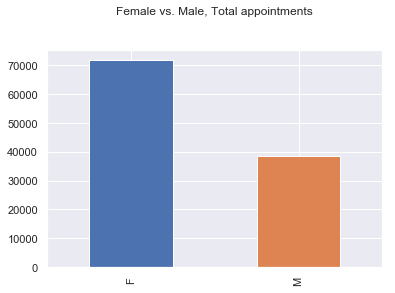

In [150]:
appt_sex.plot(kind = 'bar', title = 'Female vs. Male, Total appointments')

### 2. Age

The distribution of Patients by Age shares some striking similarities to the distribution of days to appointment in that the highest concentration of values is 0.  The majority of patients are between the ages of 0 and 55, with an average patient age of 37.  It is also worth noting that these values did not change after the outliers were removed.

In [151]:
appt_df.Age.describe()

count    110514.000000
mean         37.084686
std          23.103024
min           0.000000
25%          18.000000
50%          37.000000
75%          55.000000
max         100.000000
Name: Age, dtype: float64

/Users/hamadalaqeel/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


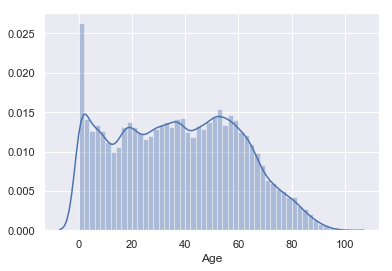

In [152]:
hist_data(appt_df.Age, "b")

In [153]:
bins = [0, 18, 35, 65, 101]
labels = ['Child', 'Young Adult', 'Adult', 'Elderly']
age_groups = pd.cut(appt_df.Age, bins, right=False, labels=labels)
appt_df['Age_Group'] = age_groups

In [154]:
group_count = appt_df.Age_Group.value_counts()
group_count

Adult          44498
Child          27378
Young Adult    24244
Elderly        14394
Name: Age_Group, dtype: int64

### 3. Economics

Only 10% of patients received scholarship.  Scholarship can be compared to government sponsored health-care assistance.  Medicare and Medicaid are similar to this in the United States.

In [155]:
eco = percent_convert(appt_df['Scholarship'])
eco

0    90.0
1    10.0
Name: Scholarship, dtype: float64

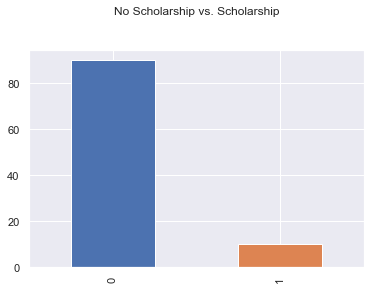

In [156]:
eco.plot(kind = 'bar', title = 'No Scholarship vs. Scholarship')

### 4. Disease

Disease can effect every part of a patient's life including their ability to show up for appointments.  It seems rather ironic that this may be the case due to the necessity of keeping those appointments because of underlying health problems.  In order to get a more quantitative view we combined the data further by creating a new dataframe to hold the unique values as well as creating a new series in the dataframe to represent disease as a whole.


In [157]:
disease_df = appt_df[['Alcoholism', 'Diabetes', 'Hypertension']] 

In [158]:
disease_df.apply(percent_convert)

,Alcoholism,Diabetes,Hypertension
0,97.0,93.0,80.0
1,3.0,7.0,20.0


In [159]:
appt_df['Disease'] = appt_df.Alcoholism + appt_df.Diabetes + appt_df.Hypertension

In [160]:
appt_df.Disease.value_counts()

0    85300
1    17581
2     7377
3      256
Name: Disease, dtype: int64

In [161]:
appt_df['Disease'].replace(to_replace=[2, 3], value= 1, inplace=True)

In [162]:
dis_count = appt_df.Disease.value_counts()
dis_count

0    85300
1    25214
Name: Disease, dtype: int64

In [163]:
# Calculate the percentage of patients that have a disease.
dis_per = percent_convert(appt_df.Disease)
dis_per

0    77.0
1    23.0
Name: Disease, dtype: float64

### 5. Technical Aptitude

Approximately one-third of patients opted to receive, or received a text reminder of their appointment.  This is a relatively low number the cause of which can be a number of factors including: age, economics, sex and wait times.  For patients who had a wait time of a day or less a text reminder might not be appropriate.

In [164]:
# Convert values to a percentage
txt = percent_convert(appt_df.Text)
txt

0    68.0
1    32.0
Name: Text, dtype: float64

In [165]:
#Compare value totals
appt_df.Text.value_counts()

0    75033
1    35481
Name: Text, dtype: int64

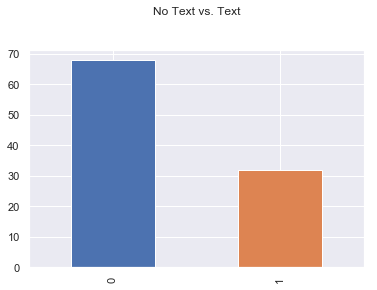

In [166]:
txt.plot(kind = 'bar', title = 'No Text vs. Text')

### 6. Wait time

This is particularly interesting as it appears that the majority of patients wait between 0 and 15 days for an appointment. The **_average_** wait time being 10 days.  

/Users/hamadalaqeel/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


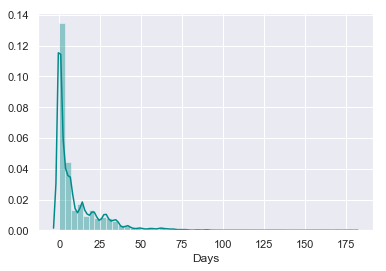

In [167]:
hist_data(appt_df.Days, "darkcyan")

In [168]:
appt_df.Days.describe()

count    110514.000000
mean         10.184438
std          15.255288
min           0.000000
25%           0.000000
50%           4.000000
75%          15.000000
max         179.000000
Name: Days, dtype: float64

In [169]:
#Categorize wait times by timeperiod for further analysis.
bins = [0, 1, 15, 31, 91, 200]
labels = ['Same Day', '1 - 14 Days', '15 - 30 Days', '31 - 90 Days', '> 90 Days']
wait_period = pd.cut(appt_df.Days, bins, right=False, labels=labels)
appt_df['Wait_Period'] = wait_period

In [170]:
#Examine age spread of patients.
appt_df.Wait_Period.value_counts()

1 - 14 Days     44207
Same Day        38560
15 - 30 Days    17370
31 - 90 Days    10160
> 90 Days         217
Name: Wait_Period, dtype: int64

### 7. Show vs. No Show

It seems that most patients showed up for their appointments by a margin of 4 to 1. This indicates a small percentage of patients did not go to their appointments.

In [171]:
percent_convert(appt_df['NoShow'])

No     80.0
Yes    20.0
Name: NoShow, dtype: float64

In [172]:
show = appt_df['NoShow'].value_counts()
show

No     88203
Yes    22311
Name: NoShow, dtype: int64

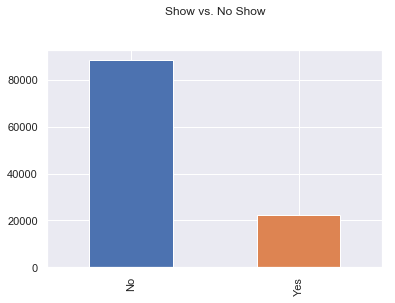

In [173]:
show.plot(kind='bar', title='Show vs. No Show')


### Futher Finds
Based on what we have seen in the data so far, we can say with confidence that most patients did arrive for their appointments. At present it is unclear whether age, disease, economics, or technical apptitude played a factor.  We will investigate these further.  This leaves sex and location.  Sex may play a factor however, with the data imbalance it is unlikely that the patient's sex alone is a definitive factor.  Location may play a factor however with **_81 total locations_** and only **_56%_** of those patients being unique it will be difficult to accurately depict that location was a determining factor. 



## Does Age play a huge factor in patients not showing?
Classifying by **_Age Group_** shows that **children and young adults** are less likely to show up for an appointment than **adults**.  **Elderly** have the least number of overall appointments but do seem to have a higher tendency to not show up for an appointment.

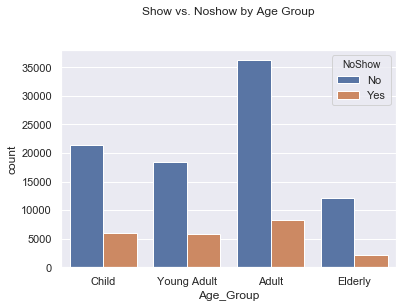

In [174]:
ax = sns.countplot(x=appt_df.Age_Group, hue = appt_df.NoShow, data = appt_df)
ax.set_title('Show vs. Noshow by Age Group')
plt.show()

## Is Scholarship the reason why patients don’t show?

Whether a patient was on **_Scholarship_** did seem to be a factor in whether they would show up for an appointment.  The data seems to indicate those that were not on **_Scholarship_** tended to show up for an appointment versus those who were on **_Scholarship_**.  We were not able to definitively state this due to the data imbalance.

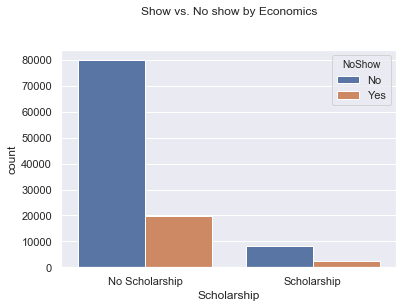

In [176]:
ax = sns.countplot(x=appt_df.Scholarship, hue = appt_df.NoShow, data = appt_df)
ax.set_title('Show vs. No show by Economics')
labels=['No Scholarship', 'Scholarship']
ax.set_xticklabels(labels)
plt.show()

## Does not receiving and SMS message cause patients to not show?

Surprisingly it appeared that patients who received a text reminder were less likely to show up for an appointment than those who did not receive a text.  

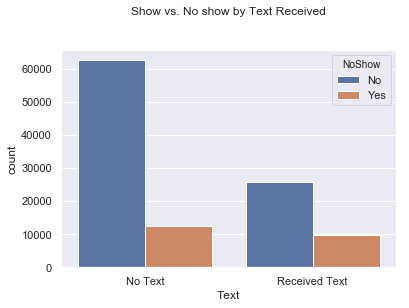

In [177]:
ax = sns.countplot(x=appt_df.Text, hue = appt_df.NoShow)
ax.set_title('Show vs. No show by Text Received')
labels=['No Text', 'Received Text']
ax.set_xticklabels(labels)
plt.show()

### lets answer some more questions other than our main questions, why not right?

There did not seem to be a direct relationship between sex and whether a patient would show up for an appointment.  There is quite an imbalance so an accurate depiction cannot be derrived from the data.

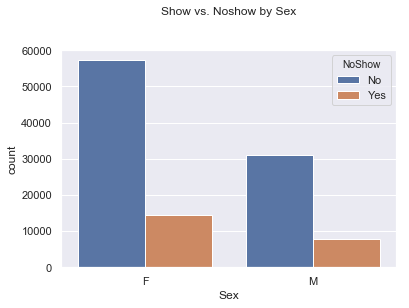

In [178]:
#Plot the Show/No Show rates by Sex.
ax = sns.countplot(x=appt_df.Sex, hue = appt_df.NoShow, data = appt_df)
ax.set_title('Show vs. Noshow by Sex')
plt.show()

The most significant indicator of a patient showing up for an appointment appears to be wait time.  
At **_15 days_** and beyond we see a significant shift in no shows.

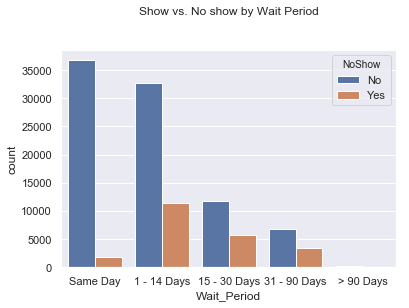

In [179]:
#Plot Show/No show by Wait_Period.
ax = sns.countplot(x=appt_df.Wait_Period, hue = appt_df.NoShow, data = appt_df)
ax.set_title('Show vs. No show by Wait Period')
plt.show()

/Users/hamadalaqeel/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


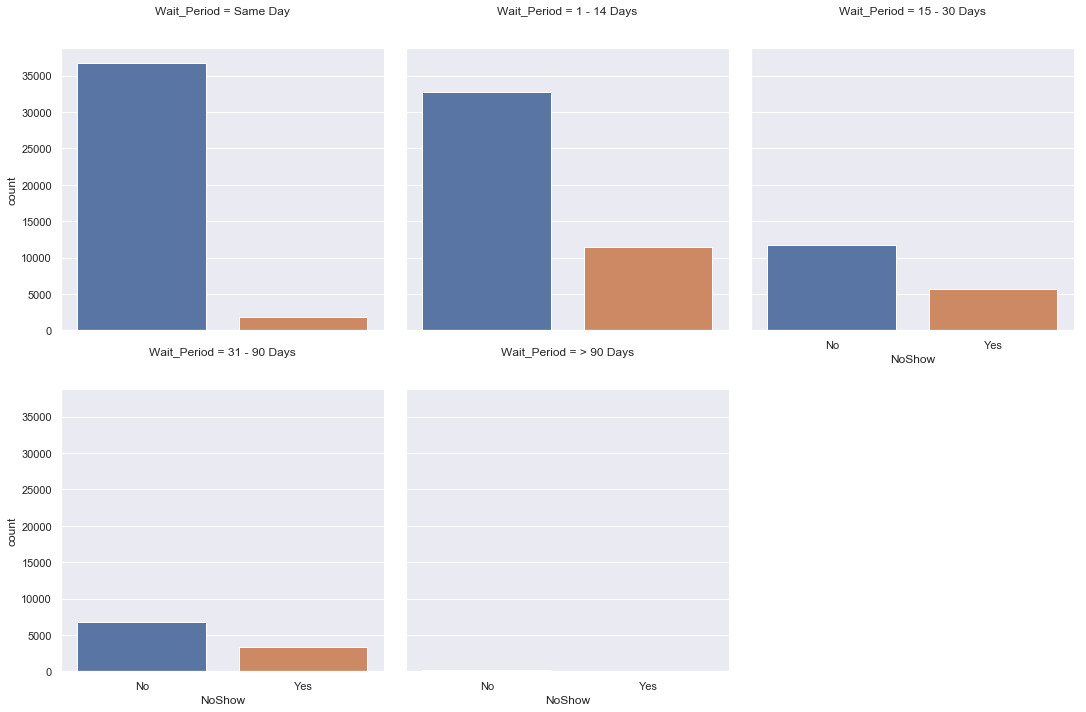

In [180]:
g = sns.factorplot('NoShow', col = 'Wait_Period', col_wrap = 3, data = appt_df, kind = 'count')

Finally, we took a look at **_Location_**.  First, we examined the overall Show/NoShow rates sorted by values.  While the first few locations do seem to have a significant number of no show patients there didn't seem to be a direct relationship between the location and a patient not showing up.  The numbers appear to be directly related to the volume of appointments as a whole. To see it in more detail we took the top 10 locations and examined their Show/No Show rates.
Lastly, we created a heatmap that showed the overall rate of disease by age group and combined that data with whether a patient showed up to their appointment by location.  There did not seem to be a significant relationship between any of these factors.
The heatmap showed that the younger a patient is the less likely they are to suffer from disease and the older a patient is the more likely disease will be present.  It did not appear that these factors were direct contributors to whether a patient showed up for their appointment.

In [181]:
# Show a value of unique locations in the dataset.
appt_df['Location'].nunique()

81

In [182]:
# Create an index of locations by total appointments.
order_loc = appt_df['Location'].value_counts().index

In [183]:
#Create an index of the top 10 locations by total appointments.
top_loc = appt_df['Location'].value_counts().head(10).index

In [184]:
top_loc_count = appt_df.Location.value_counts().head(10)

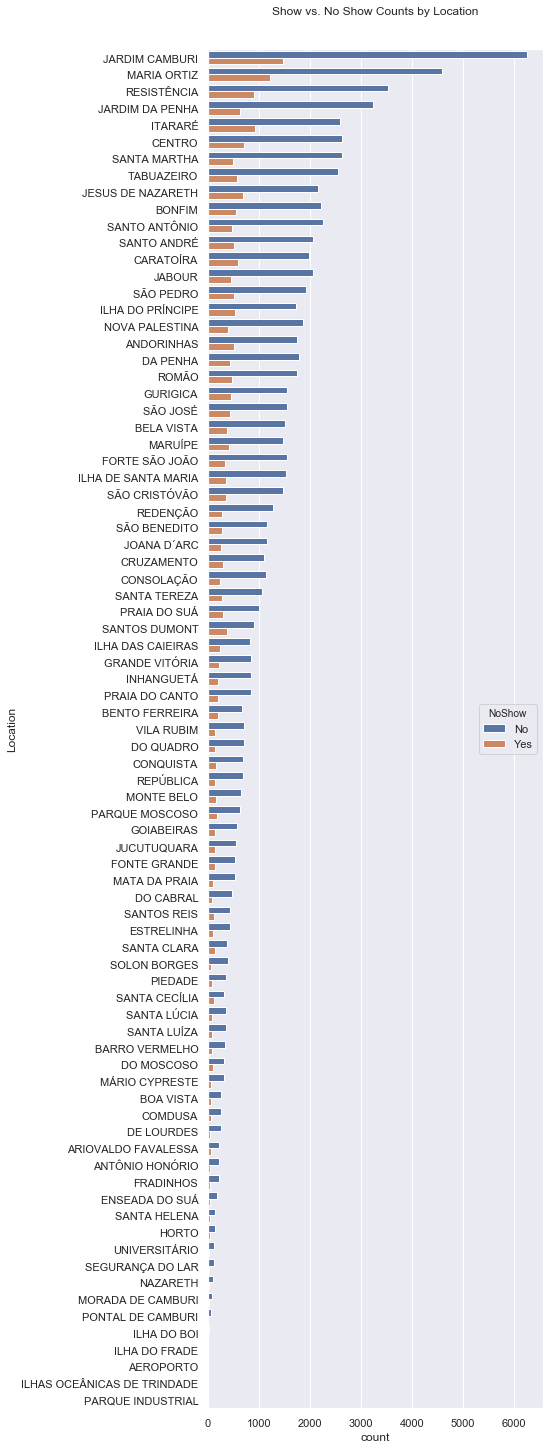

In [185]:
#Plot Show/No Show data by Location.
f, ax = plt.subplots(figsize=(6, 25))
ax = sns.countplot(y=appt_df.Location, hue = appt_df.NoShow, data = appt_df, order=order_loc)
ax.set_title('Show vs. No Show Counts by Location')
plt.show()

In [186]:
#Created a dataframe with just location and NoShow data for further analysis.
loc_ns = appt_df[['Location', 'NoShow']]

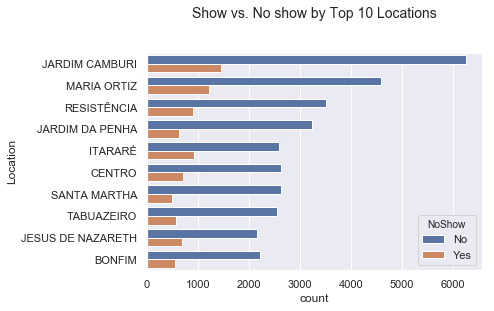

In [187]:
#Plot the top 10 locations by Show/No Show values.
ax = sns.countplot(y=loc_ns.Location, hue = loc_ns.NoShow, data = loc_ns, order=top_loc)
ax.set_title('Show vs. No show by Top 10 Locations', fontsize=14)
plt.show()

In [188]:
#Create a dataframe to see if there is a relationship between Location, NoShow, Age and Disease.
df_loc_stats = appt_df[['Location', 'NoShow', 'Age_Group', 'Disease']]

In [189]:
#Prepare the dataframe by grouping and averaging the data.
loc_stat_group = df_loc_stats.groupby(['Location','Age_Group', 'NoShow']).mean().dropna()

In [190]:
#Reforming the data for visualization.
loc_stat_group = loc_stat_group.unstack(level=1).dropna()

Text(24.5469,0.5,'Show/No Show by Location')

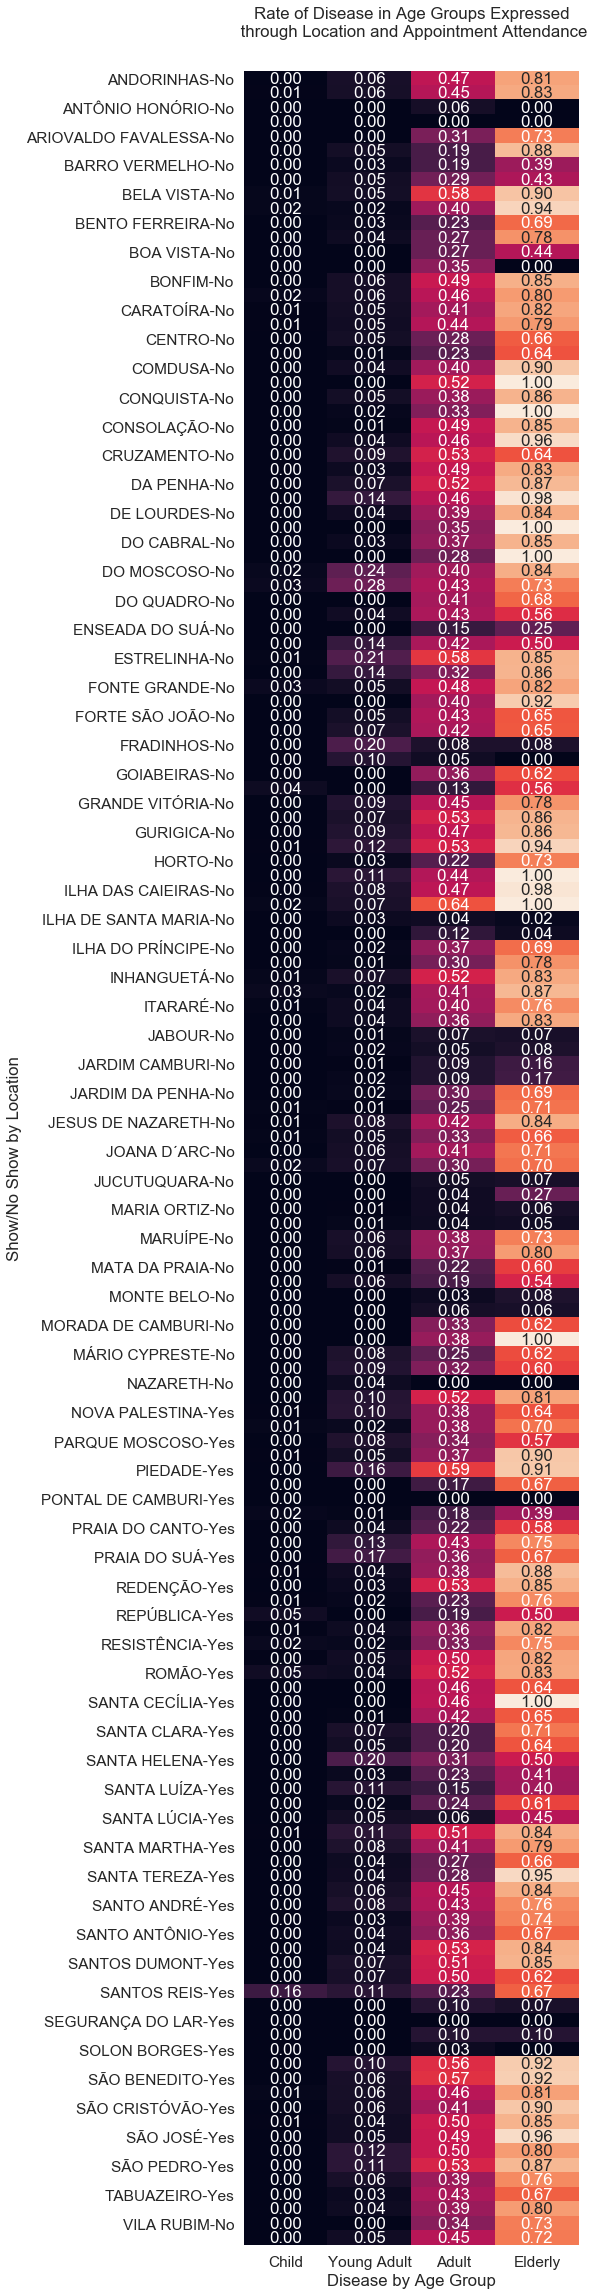

In [191]:
#Create a heatmap with the prepared grouping for analysis.
sns.set(font_scale=1.4)
fig, ax = plt.subplots(figsize=(6,40))
ax.set_title('Rate of Disease in Age Groups Expressed\n through Location and Appointment Attendance')
from matplotlib import rcParams
rcParams['axes.titlepad'] = 35 
sns.heatmap(loc_stat_group, annot=True, fmt='.2f', ax=ax, cbar=False)
ax.set_xlabel('Disease by Age Group')
ax.set_xticklabels(['Child', 'Young Adult', 'Adult', 'Elderly'], rotation=0)
ax.set_ylabel('Show/No Show by Location')

## Conclusions

First of all, Machine learning was not used here as it was not needed, so 'Data modeling' step was not included.

The data imbalance and quality specifically by Scholarship, Sex, Text and unique PatientId left few factors to explore when determining whether a patient will show up for an appointment. There were some surprising insights when evaluating text rate of patients that showed up but there was not enough of a data balance to show causeation. 

The only factor out of all factors examined in the data set that showed possibly causation was the number of **days** a patient waited for their appointment.  It was not surprising to see that the longer a patient waited the less likely they were to show up for an appointment.  The data seemed to suggest that a patient was more likely to show up for an appointment if the schedule date and the appointment date were within 2 weeks.  

While other factors like **Age** at first appeared to be significant there was only a small variance is the rate of disease by **Age Group** and not showing up.  The variance in that data was not significant enough to establish causation.

The final conclusion in this investigation is that the quality of the data was not enough to state with certainty why a patient would or would not show up for an appointment.

<a id='ref'></a>
## Sources

https://python-graph-gallery.com/seaborn/ <br>
https://stackoverflow.com/questions/34023918/make-new-column-in-panda-dataframe-by-adding-values-from-other-columns <br>
https://stackoverflow.com/questions/27060098/replacing-few-values-in-a-pandas-dataframe-column-with-another-value <br>
https://stackoverflow.com/questions/23117159/unicodeencodeerror-ascii-codec-cant-encode-character-u-u201c-when-converti <br>
https://github.com/mwaskom/seaborn/issues/1029